In [1]:
## elegant practical HOHMANN ONLY

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
G = 6.6726e-11   #Grav constant
dt=200  #timestep size
n= 105652  # *based on theorteical transfer time and dt=200   gives exactly from start to end of transfer
i=0 #for the loop later 105652
PI=np.pi
#n=223000
#dt=100

In [5]:
class Planet:
    def __init__(self, name, mass, dist, radius, period,theta):
        self.name=name
        self.mass=mass
        self.dist=dist
        self.radius=radius
        self.period=period
        self.theta=theta  #
        self.pos=self.dist*np.array([np.cos(2*PI*dt*i/self.period+theta),np.sin(2*PI*dt*i/self.period+theta)])
        #angular offset based on 28/07/2022   https://www.theplanetstoday.com/


In [6]:
class Satellite:
    def __init__(self, name, mass, pos):
        self.name=name
        self.mass=mass
        self.pos=pos
        self.vel=np.array([0,0])


In [7]:
def toUnit(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

def grav(pos, m1,m2,m3,m4): #m1 is sun, m2 earth, m3 mars, m4 venus
    acc=np.array([0.0,0.0])
    r1=m1.pos-pos
    r2=m2.pos-pos
    r3=m3.pos-pos
    r4=m4.pos-pos
    magr1=np.linalg.norm(r1)
    magr2=np.linalg.norm(r2)
    magr3=np.linalg.norm(r3)
    magr4=np.linalg.norm(r4)
    r11=toUnit(r1)
    r21=toUnit(r2)
    r31=toUnit(r3)
    r41=toUnit(r4)
    acc1_mag= G*m1.mass/(magr1*magr1)
    acc2_mag= G*m2.mass/(magr2*magr2)
    acc3_mag= G*m3.mass/(magr3*magr3)
    acc4_mag= G*m4.mass/(magr4*magr4)
    acc[0]= acc1_mag*r11[0]+acc2_mag*r21[0]+acc3_mag*r31[0]+acc4_mag*r41[0]
    acc[1]= acc1_mag*r11[1]+acc2_mag*r21[1]+acc3_mag*r31[1]+acc4_mag*r41[0]
    return acc

def epsilonOG(POSX,POSY,SPEED,k,m1,m2,m3,m4): #m1,m2,m3,m4 are sun,earth,mars,venus, k is i (which element of array pointer)
    POS=np.array([POSX[k],POSY[k]])
    EK=0.5*SPEED[k]**2
    r1=m1.pos-POS
    r2=m2.pos-POS
    r3=m3.pos-POS
    r4=m4.pos-POS
    magr1=np.linalg.norm(r1)
    magr2=np.linalg.norm(r2)
    magr3=np.linalg.norm(r3)
    magr4=np.linalg.norm(r4)
    ham=EK-G*((m1.mass/magr1)+(m2.mass/magr2)+(m3.mass/magr3)+(m4.mass/magr4))
    return ham

def epsilon(POS,SPEED,m1,m2,m3): #m1,m2,m3,m4 are sun,earth,mars,venus, k is i (which element of array pointer)
    EK=0.5*SPEED**2
    r1=m1.pos-POS
    r2=m2.pos-POS
    r3=m3.pos-POS
    magr1=np.linalg.norm(r1)
    magr2=np.linalg.norm(r2)
    magr3=np.linalg.norm(r3)

    ham=EK-G*((m1.mass/magr1)+(m2.mass/magr2)+(m3.mass/magr3))
    return ham



def boost(fly, v):
    fly.vel[0]+=v[0]
    fly.vel[1]+=v[1]

def KE_per_mass(fly):
    vv=np.linalg.norm(fly.vel)
    return 0.5*(vv**2)

def g_factors(pos,m1):
    acc=np.array([0.0,0.0])
    r1=m1.pos-pos
    magr1=np.linalg.norm(r1)
    return G*m1.mass/(magr1*magr1)

In [8]:
earth = Planet("earth", 5.972e+24 , 149.6e+9,6371000,3.154e+7,0) #period 3.154e+7
mars = Planet("mars", 6.39e+23, 227.94e+9, 3389500, 5.858e+7,0.749)#theoretical angular offset0.7768775717671333, period  59.4e+6
sun = Planet("sun", 1.99e+30, 0, 696340000, 31446925,0)
rocket = Satellite("rocket", 2.8e+6,np.array([earth.radius+earth.dist, 0]))
rocket_vel_at_pole=((earth.dist+earth.radius)/earth.period)*2*PI
rocket.vel[1]=(((earth.dist+earth.radius)/earth.period)+(earth.radius/86400))*2*PI

In [9]:
#loading the theoretical positions of everything
RX=np.loadtxt('rocket_Xpos_dt200.txt')
RY=np.loadtxt('rocket_Ypos_dt200.txt')
speed=np.loadtxt('rocket_speed_dt200.txt')
MX=np.loadtxt('mars_Xpos_dt200.txt')
MY=np.loadtxt('mars_Ypos_dt200.txt')
EX=np.loadtxt('earth_Xpos_dt200.txt')
EY=np.loadtxt('earth_Ypos_dt200.txt')

hams=np.loadtxt('hamiltonian_dt200.txt')



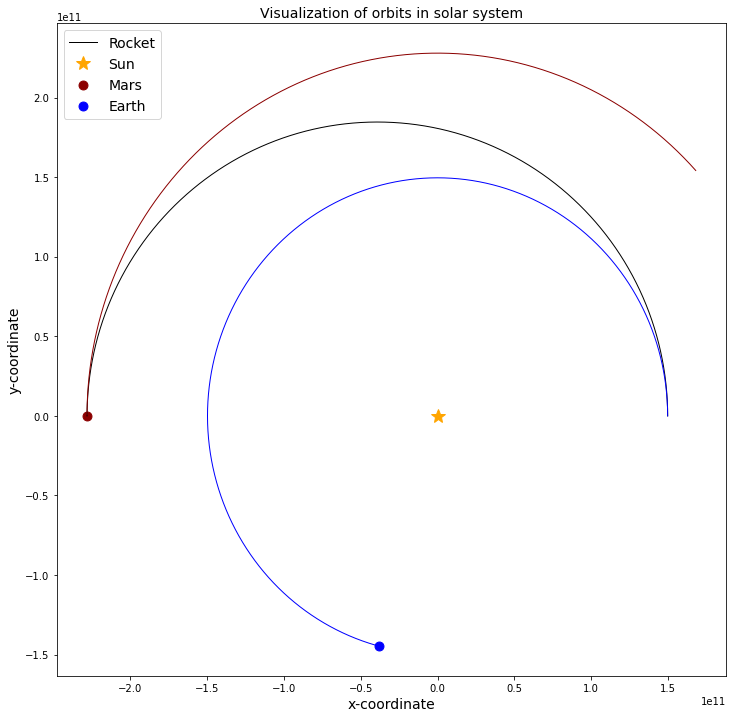

In [10]:
#Create figure
fig=plt.figure(figsize=(12,12))
#Create 3D axes
ax=fig.add_subplot(111)

g_sun=np.zeros(len(hams))
g_earth=np.zeros(len(hams))
g_mars=np.zeros(len(hams))

energy=np.zeros(len(hams))



for i in range(0,len(RX)):
    rocket.pos=np.array([RX[i],RY[i]])
    earth.pos=np.array([EX[i],EY[i]])
    mars.pos=np.array([MX[i],MY[i]])
    energy[i]= epsilon(rocket.pos,speed[i],sun,earth,mars)
    g_sun[i]=g_factors(rocket.pos,sun)
    g_earth[i]=g_factors(rocket.pos,earth)
    g_mars[i]=g_factors(rocket.pos,mars)
    
plt.plot(RX, RY,label='Rocket', color="black", linewidth=1)
ax.plot(MX,MY, color="darkred", linewidth=1)
ax.plot(EX,EY, color="blue", linewidth=1 )
ax.plot(0,0,label='Sun', marker="*", markersize=15, color="orange", linewidth=0)
#plot the final positions
ax.scatter(MX[i],MY[i], label="Mars", color="darkred", marker="o",s=80)
ax.scatter(EX[i],EY[i], label='Earth', color="blue", marker="o",s=80)

ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_title("Visualization of orbits in solar system",fontsize=14)
ax.legend(loc="best",fontsize=14)


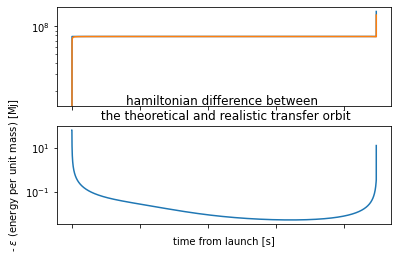

In [11]:
fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
timen=np.zeros(len(hams))
e0=hams[0]
plothams=np.zeros(len(hams))
plotEs=np.zeros(len(hams))
delta=np.zeros(len(hams))
for i in range(0,len(hams)):
    timen[i]=dt*i
    plothams[i]=hams[i]-hams[0]
    plotEs[i]= energy[i]-hams[0]
    delta[i]=hams[i]-energy[i]
ax1.semilogy(timen,plothams)
ax1.semilogy(timen,plotEs)
ax2.semilogy(timen,delta/1000000)
plt.title("hamiltonian difference between \n the theoretical and realistic transfer orbit")
plt.xlabel('time from launch [s]')
plt.ylabel('- $\epsilon$ (energy per unit mass) [Mj]')
ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

g_earth1=np.zeros(len(timen))
g_sun1=np.zeros(len(timen))
g_mars1=np.zeros(len(timen))
timenp=np.zeros(len(timen))
for i in range(0,len(timen)):
    g_earth1[i]=g_earth[i]
    g_sun1[i]=g_sun[i]
    g_mars1[i]=g_mars[i]
    timenp[i]=timen[i]

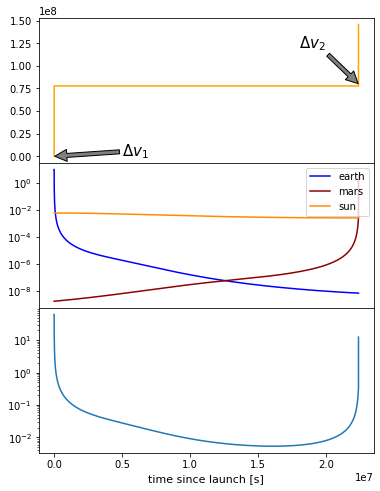

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(6,8))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(timen, plothams, color='orange', label='theoretical transfer hamiltonian difference')
axs[0].annotate('$\Delta v_1$', xy=(0, 0), xytext=(5000000, 4),arrowprops=dict(facecolor='grey', shrink=0.01), fontsize=15)
axs[0].annotate('$\Delta v_2$', xy=(timen[i],8e+7), xytext=(18000000, 12e+7),arrowprops=dict(facecolor='grey', shrink=0.01), fontsize=15)

axs[1].semilogy(timen,g_earth, label='earth', color="blue")
axs[1].semilogy(timen,g_mars, label='mars', color='darkred')
axs[1].semilogy(timen,g_sun, label='sun', color='darkorange')
axs[1].legend(loc='best', fontsize=10)


axs[2].semilogy(timen,delta/1000000)
#axs[2].ylabel('gravitational influence of planets at different times of flight')

plt.xlabel('time since launch [s]', fontsize=11)

plt.show()


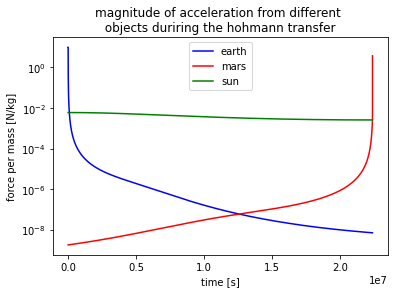

In [225]:
error=1650
g_earth1=np.zeros(len(timen))
g_sun1=np.zeros(len(timen))
g_mars1=np.zeros(len(timen))
timenp=np.zeros(len(timen))
for i in range(0,len(timen)):
    g_earth1[i]=g_earth[i]
    g_sun1[i]=g_sun[i]
    g_mars1[i]=g_mars[i]
    timenp[i]=timen[i]
plt.semilogy(timen,g_earth, label='earth', color="blue")
plt.semilogy(timen,g_mars, label='mars', color='red')
plt.semilogy(timen,g_sun, label='sun', color='green')
plt.title("magnitude of acceleration from different \n objects duriring the hohmann transfer ")
plt.xlabel("time [s]")
plt.ylabel("force per mass [N/kg]")
plt.legend(loc="best")

In [152]:
print(g_mars[111538])
print(g_mars[111537])
print(g_mars[111536])
print(g_mars[111000])

3.7112881317552593
3.612135728469645e-05
3.616065768609686e-05
7.197732770737689e-05


In [48]:
print(energy[2]-energy[1])

18921858.577841997


In [161]:
a=(300000/mars.period)
b=0.5-a
c=2*PI*a
print(c)

0.03217745974998081


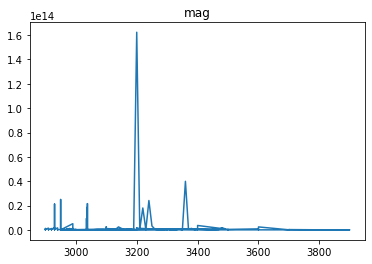

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x=np.loadtxt('3ddata.txt', usecols=(0,))
y=np.loadtxt('3ddata.txt', usecols=(2,))
ph=np.loadtxt('3ddata.txt', usecols=(1,))

plt.plot(x,y)
plt.title('mag')
plt.show()

3 5000
3.3670846704297577 -6.7341693408595145 -1.0000000000000002
[-0.30420875 -0.06382397  0.36803272]
[-0.07115451  0.11315201 -0.0419975 ]
[-0.49468749  0.96578019 -0.4710927 ]
[ 0.30989523 -1.76596303  1.4560678 ]


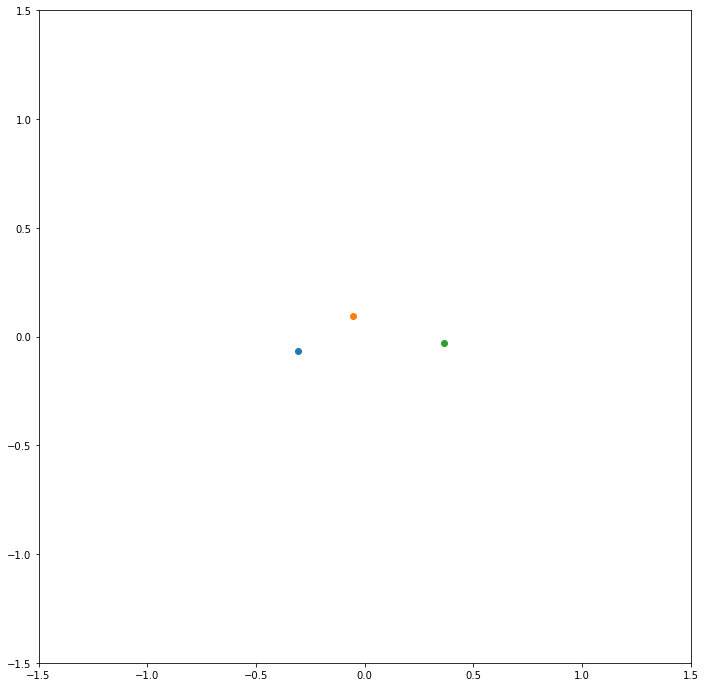

In [1]:
from numpy import sin, cos
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

n=3

# create a time array up to t_max sampled at steps of dt
dt=0.01
t_min=0.
t_max=50.
nstep=np.int((t_max-t_min)/dt)
print(n,nstep)
xp=np.zeros([n,nstep+1])
yp=np.zeros([n,nstep+1])

G=1.  # scaling of the potential
m=np.ones(n)  # mass of particles
eps=0.1  # gravitational softening
iseed=21
np.random.seed(iseed)

# set the initial 2D Cartesian coordinates and speeds
#x=np.zeros(n)
#y=np.zeros(n)
#vx=np.zeros(n)
#vy=np.zeros(n)
x=np.random.rand(1,n)[0]
y=np.random.rand(1,n)[0]
vx=np.random.rand(1,n)[0]
vy=np.random.rand(1,n)[0]

# shift to the centre of mass frame
xbar=np.sum(m*x)/np.sum(m)
x=x-xbar
ybar=np.sum(m*y)/np.sum(m)
y=y-ybar

# shift to the centre of momentum frame
vxbar=np.sum(m*vx)/np.sum(m)
vx=vx-vxbar
vybar=np.sum(m*vy)/np.sum(m)
vy=vy-vybar
vxbar=np.sum(m*vx)/np.sum(m)
vx=vx-vxbar
vybar=np.sum(m*vy)/np.sum(m)
vy=vy-vybar

def sep(x1,x2,y1,y2,eps):  # function for 2D separation
    return np.sqrt((x1-x2)*(x1-x2)+(y1-y2)*(y1-y2)+eps*eps)

# determine energies
s01=sep(x[0],x[1],y[0],y[1],eps)
s12=sep(x[1],x[2],y[1],y[2],eps)
s20=sep(x[2],x[0],y[2],y[0],eps)
pe=-G*(m[0]*(m[1]/s01+m[2]/s20)+m[1]*m[2]/s12)
ke=np.sum(0.5*m*(vx*vx+vy*vy))
virial=-2*ke/pe
# rescale speeds so they are in keeping with the virial theorem
vx=vx/np.sqrt(virial)
vy=vy/np.sqrt(virial)
ke=np.sum(0.5*m*(vx*vx+vy*vy))
print(ke,pe,2*ke/pe)

print(x)
print(y)
print(vx)
print(vy)

step=0
while step<nstep:  # integrate forward in time
    fx=np.zeros(n)
    fy=np.zeros(n)
    for i in range(0,n-1):  # loop over all but the final particles
        for j in range(i+1,n):  # only the later particles in array
            s=sep(x[i],x[j],y[i],y[j],eps)
            fxij=-G*m[i]*m[j]*(x[i]-x[j])/(s*s*s)  # calculate forces
            fyij=-G*m[i]*m[j]*(y[i]-y[j])/(s*s*s)
            fx[i]=fx[i]+fxij
            fy[i]=fy[i]+fyij
            fx[j]=fx[j]-fxij   # use N3L to save calculations
            fy[j]=fy[j]-fyij
    vx=vx+fx*dt/m   # update velocities and positions
    vy=vy+fy*dt/m
    x=x+vx*dt
    y=y+vy*dt
#    s01=sep(x[0],x[1],y[0],y[1],eps)
#    s12=sep(x[1],x[2],y[1],y[2],eps)
#    s20=sep(x[2],x[0],y[2],y[0],eps)
#    pe=-G*(m[0]*(m[1]/s01+m[2]/s20)+m[1]*m[2]/s12)
#    ke=np.sum(0.5*m*(vx*vx+vy*vy))
#    print((step+1)*dt,pe+ke)  # check energy conservation
    step=step+1
    xp[:,step]=x  # store output positions
    yp[:,step]=y

int_ms=10 # interval between frames in ms
lag=50

fig=plt.figure(figsize=(12,12))

xmin=-1.5
xmax=-xmin
ymin=xmin
ymax=xmax
ax=fig.add_subplot(111,autoscale_on=False,xlim=(xmin,xmax),ylim=(ymin,ymax))
ax.set_aspect('equal')
orbit0,=ax.plot([],[],'o-',lw=2)
trail0,=ax.plot([],[],'b-',lw=1)
orbit1,=ax.plot([],[],'o-',lw=2)
trail1,=ax.plot([],[],'r-',lw=1)
orbit2,=ax.plot([],[],'o-',lw=2)
trail2,=ax.plot([],[],'g-',lw=1)
x0,y0,x1,y1,x2,y2=[],[],[],[],[],[]

def animate_all(i):
    modified=[] # List of objects in the plot that we've modified
    if i>lag:
        imin=i-lag
    else:
        imin=0
    thisx=[xp[0,i]]
    thisy=[yp[0,i]]
    orbit0.set_data(thisx,thisy)
    x0=xp[0,imin:i]
    y0=yp[0,imin:i]
    trail0.set_data(x0,y0)
    thisx=[xp[1,i]]
    thisy=[yp[1,i]]
    orbit1.set_data(thisx,thisy)
    x1=xp[1,imin:i]
    y1=yp[1,imin:i]
    trail1.set_data(x1,y1)
    thisx=[xp[2,i]]
    thisy=[yp[2,i]]
    orbit2.set_data(thisx,thisy)
    x2=xp[2,imin:i]
    y2=yp[2,imin:i]
    trail2.set_data(x2,y2)
    modified+=[orbit0,trail0,orbit1,trail1,orbit2,trail2]
    return modified

ani=animation.FuncAnimation(fig,animate_all,range(1,nstep),interval=int_ms,blit=True,repeat=False)

plt.show()


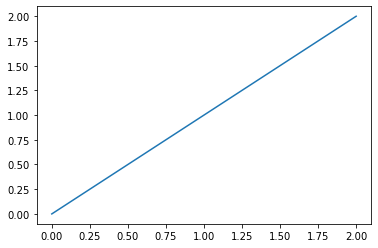

In [5]:
import matplotlib.pyplot as plt

plt.plot([0,1,2], [0,1,2])

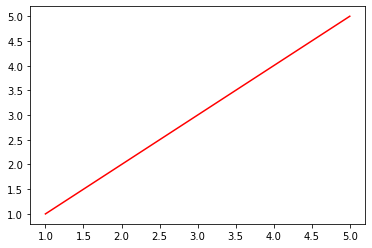